In [13]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\Mirza Razab Bharti'

In [4]:
data=pd.read_excel('Tips Quick EDA exercise v0.1 (5).xlsx')

In [5]:
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0
6,8.77,2.00,Male,No,Sun,Dinner,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4.0
8,15.04,1.96,Male,No,Sun,Dinner,2.0
9,14.78,3.23,Male,No,Sun,Dinner,2.0


## What is the overall average tip?

In [9]:
mean_df=data['tip'].mean()
mean_df

2.99827868852459

## Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [10]:
data['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [12]:
median_data=data['tip'].median()
median_data

2.9

## answer
* mean and median are almost equal
* it shows  the distribution can be assumed to be approximately symmetrical

## Prepare a boxplot for 'tip', are there any outliers?

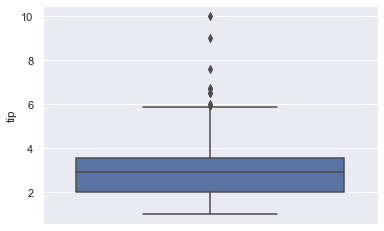

In [24]:
sns.boxplot(data['tip'], orient='vertical')

## answer
* as we can see from the boxplot there are some outliers above 6

## Prepare a boxplot for 'tip', are there any outliers?

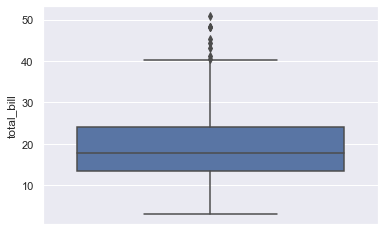

In [25]:
sns.boxplot(data['total_bill'], orient='vertical')

## answer
* as we can see from the boxplot there are some outliers above 40

## Gender: what is the percent of females in the data? 

In [26]:
s=data.sex
s

0        Female
1          Male
2          Male
3          Male
4        Female
         ...   
240      Female
241        Male
242        Male
243      Female
244    0.356557
Name: sex, Length: 245, dtype: object

In [31]:
count=s.value_counts()
count

Male                   157
Female                  87
0.35655737704918034      1
Name: sex, dtype: int64

In [32]:
percent=s.value_counts('Female')
percent

Male                   0.640816
Female                 0.355102
0.35655737704918034    0.004082
Name: sex, dtype: float64

## answer
* percentage of female is 35.52

## Prepare a bar plot with the bars representing the percentage of records for each gender.

[Text(0, 0.5, 'percentage'), Text(0.5, 0, 'Female-Male')]

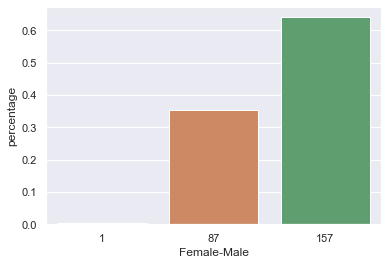

In [49]:
sns.barplot(x=count, y=percent,data=data).set(xlabel='Female-Male', ylabel='percentage')


## Does the average tip differ by gender? Does one gender tip more than the other?

In [50]:
print(data.groupby('sex').tip.mean())

sex
0.35655737704918034         NaN
Female                 2.833448
Male                   3.089618
Name: tip, dtype: float64


## answer
* yes male gender tip more than the other

## Does the average tip differ by the time of day?

In [51]:
print(data.groupby('time').tip.mean())

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


## answer
* yes time differ on dinner there is more tip

## Does the average tip differ by size (number of people at the table)?

In [52]:
print(data.groupby('size').tip.mean())

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64


## answer
* yes it differs by size the more people the more tip

## Do smokers tip more than non-smokers?

In [53]:
print(data.groupby('smoker').tip.mean())

smoker
0.6188524590163934         NaN
No                    2.991854
Yes                   3.008710
Name: tip, dtype: float64


## answer
* yes smokers tip more than non-smoker

## Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [59]:
data.groupby(['smoker','sex'])['tip'].mean()

smoker              sex                
0.6188524590163934  0.35655737704918034         NaN
No                  Female                 2.773519
                    Male                   3.113402
Yes                 Female                 2.931515
                    Male                   3.051167
Name: tip, dtype: float64

## Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [64]:
pct_tip=data.tip/data.total_bill
pct_tip

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
240    0.073584
241    0.088222
242    0.098204
243    0.159744
244         NaN
Length: 245, dtype: float64

## Does pct_tip differ by gender? Does one gender tip more than the other?

In [66]:
print(data.groupby('sex').pct_tip.count())

sex
0.35655737704918034      0
Female                  87
Male                   157
Name: pct_tip, dtype: int64


## answer
* yes pct_tip differ by gender and male gender tip more than female

## Does pct_tip differ by size (number of people at the table)? 

In [67]:
print(data.groupby('size').pct_tip.count())

size
1.0      4
2.0    156
3.0     38
4.0     37
5.0      5
6.0      4
Name: pct_tip, dtype: int64


## answer
* yes pct_tip differ by size and table to 2 people give more

## Make the gender vs. smoker view using pct_tip  - does your inference change?

In [73]:
data.groupby(['sex','smoker'])['pct_tip'].mean()

sex                  smoker            
0.35655737704918034  0.6188524590163934         NaN
Female               No                    0.156921
                     Yes                   0.182150
Male                 No                    0.160669
                     Yes                   0.152771
Name: pct_tip, dtype: float64

## answer
* female who smoke give more tip
* male who does not smoke give more tip

## Make a scatter plot of total_bill vs. tip.

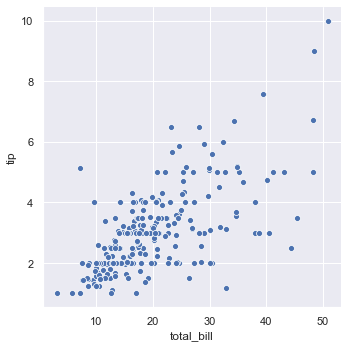

In [74]:
sns.relplot(x="total_bill", y="tip", data=data[:], kind="scatter")

## Make a scatter plot of total_bill vs. pct_tip.

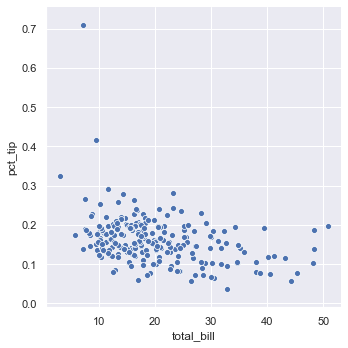

In [75]:
sns.relplot(x="total_bill", y="pct_tip", data=data[:], kind="scatter")